In [1]:
import pandas as pd

df1 = pd.read_csv("GC_class_forFigure_ordered.csv", header=[0,1], index_col=0)
df1.columns.names = ["Category", "Enzyme"]
df1

Category                    Count                                     \
Enzyme              ImProm-II 42C ImProm-II 55C SuperScriptIV  TGIRT   
Low abundance                 288           239           230    211   
Verrucomicrobiae             1310           620          1391   1029   
Unclassified                 1211          1210          1292   1216   
Alphaproteobacteria         12943          9302         12148  12385   
Deltaproteobacteria          4330          2154          3141   3001   
Gammaproteobacteria          5967          7610          2793   2576   
Planctomycetacia              357           710           247    283   
Phycisphaerae                 101           128            18     17   
Saccharimonadia               130            57            49     30   
Longimicrobia                 328           217           213    197   
Gemmatimonadetes              532           591           518    463   
BD2-11                         26            33            48     42   
S0134                         116            75            73    114   
Nitrospira                     32            34            74     70   
Bacilli                      1356           656           663    520   
Fibrobacteria                  45            35            46     36   
Entotheonellia                125           122           221    164   
Deinococci                     89            28            44     29   
Oxyphotobacteria             2798           962          1711    877   
Chloroflexia                  441           825           666    789   
Anaerolineae                  191           175           113     89   
Gitt-GS-136                   270           171           239    274   
JG30-KF-CM66                   76           145           175    175   
KD4-96                        298           264           370    406   
TK10                          275           583           522    611   
Ktedonobacteria                26            41            61     52   
Dehalococcoidia                70            98           155     97   
Bacteroidia                  2825          1817          2307   3005   
Fimbriimonadia                 69            29            32     43   
uncultured                     41            66            31     28   
Actinobacteria               5864         11263         10105  11353   
Acidimicrobiia               1203          1617          1518   1858   
Thermoleophilia              2745          4643          3733   3562   
0319-7L14                     527           442           332    392   
Nitriliruptoria               253           380           410    408   
Rubrobacteria                1351          1505          2380   1974   
MB-A2-108                      61           101            67     99   
Thermoanaerobaculia           117           127           122    146   
Subgroup                      385           284           681    501   
Holophagae                    235           139           308    191   
Blastocatellia                336           243           309    328   
Acidobacteriia                257           259           444    359   

Category               GC content                                        
Enzyme              ImProm-II 42C ImProm-II 55C SuperScriptIV     TGIRT  
Low abundance            0.500000      0.500000      0.500000  0.500000  
Verrucomicrobiae         0.534486      0.533333      0.532315  0.532096  
Unclassified             0.492766      0.507756      0.505267  0.503933  
Alphaproteobacteria      0.554835      0.553426      0.562606  0.563610  
Deltaproteobacteria      0.563930      0.566020      0.565218  0.565658  
Gammaproteobacteria      0.543056      0.536829      0.544228  0.545745  
Planctomycetacia         0.598206      0.624758      0.607147  0.619704  
Phycisphaerae            0.576535      0.573142      0.572757  0.577386  
Saccharimonadia          0.503040      0.501756      0.496003  0.496590  
Longimicrobia    

|Enzyme        |TGIRT  |SuperScriptIV|Promega42  |Promega55|
|:-------------|:-----:|:-----------:|:---------:|:-------:|
|TGIRT         | x     | TvS         | Tv42      | Tv55    |  
|SuperScriptIV | TvS   | x           | Sv42      | Sv55    |
|Promega42     | Tv42  | Sv42        | x         | P42v55  |
|Promega55     | Tv55  | Sv55        | P42v55    | x       |

In [2]:
def relativeEnrichment(a, b):
    return (a-b)/(a+b)

In [3]:
idx = pd.IndexSlice

TvS = relativeEnrichment(df1.loc[:, idx["Count", "TGIRT"]], df1.loc[:, idx["Count", "SuperScriptIV"]])
df1["Comparison", "TvS"] = TvS

Tv42 = relativeEnrichment(df1.loc[:, idx["Count", "TGIRT"]], df1.loc[:, idx["Count", "ImProm-II 42C"]])
df1["Comparison", "Tv42"] = Tv42

Tv55 = relativeEnrichment(df1.loc[:, idx["Count", "TGIRT"]], df1.loc[:, idx["Count", "ImProm-II 55C"]])
df1["Comparison", "Tv55"] = Tv55

Sv42 = relativeEnrichment(df1.loc[:, idx["Count", "SuperScriptIV"]], df1.loc[:, idx["Count", "ImProm-II 42C"]])
df1["Comparison", "Sv42"] = Sv42

Sv55 = relativeEnrichment(df1.loc[:, idx["Count", "SuperScriptIV"]], df1.loc[:, idx["Count", "ImProm-II 55C"]])
df1["Comparison", "Sv55"] = Sv55

P42v55 = relativeEnrichment(df1.loc[:, idx["Count", "ImProm-II 42C"]], df1.loc[:, idx["Count", "ImProm-II 55C"]])
df1["Comparison", "P42v55"] = P42v55

In [11]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

default_dpi = plt.rcParamsDefault["figure.dpi"]
plt.rcParams["figure.figsize"] = [6,8]

def barplotFigure(y, GC_content, name):
    # Bar position
    x_pos = np.arange(len(y))
    # "Stretching" color values betwenn 0 and 1 to get the best colourfulness
    col_norm =(GC_content-min(GC_content))/(max(GC_content-min(GC_content)))
    # Getting color pallette
    colors = cm.viridis(col_norm)
    
    # Legend construction
    plot = plt.scatter(GC_content, GC_content, c=GC_content, cmap="viridis")
    plt.clf()
    plt.colorbar(plot)

    # Barplot 
    plt.barh(x_pos, y, color=colors, align="center")
    plt.yticks(x_pos, df1.index.values)
    plt.title(name)
    
    axes = plt.gca()
    axes.set_xlim([-0.8,0.8])
    
    plt.savefig(name+".pdf", bbox_inches="tight")

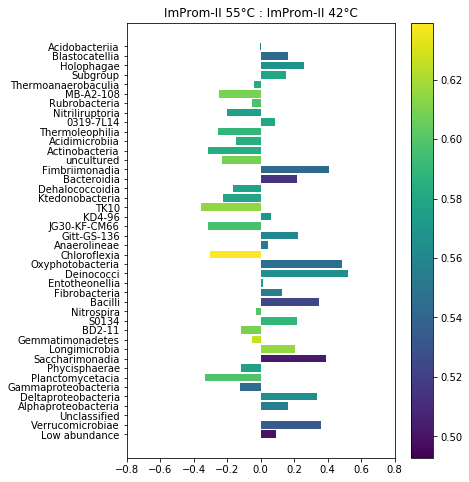

In [14]:
name = "SuperScriptIV : TGIRT            " 
barplotFigure(y=df1["Comparison", "TvS"], GC_content=df1["GC content", "TGIRT"], name=name)

name = "ImProm-II 42°C : TGIRT              " 
barplotFigure(y=df1["Comparison", "Tv42"], GC_content=df1["GC content", "ImProm-II 42C"], name=name)

name = "ImProm-II 55°C : TGIRT               " 
barplotFigure(y=df1["Comparison", "Tv55"], GC_content=df1["GC content", "ImProm-II 55C"], name=name)

name = "ImProm-II 42°C : SuperScriptIV  " 
barplotFigure(y=df1["Comparison", "Sv42"], GC_content=df1["GC content", "ImProm-II 42C"], name=name)

name = "ImProm-II 55°C : SuperScriptIV  " 
barplotFigure(y=df1["Comparison", "Sv55"], GC_content=df1["GC content", "ImProm-II 55C"], name=name)

name = "ImProm-II 55°C : ImProm-II 42°C" 
barplotFigure(y=df1["Comparison", "P42v55"], GC_content=df1["GC content", "ImProm-II 42C"], name=name)